In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.transforms as mtransforms

In [46]:
data_dir = ['./EU_hom_2', './PMT_het_2']
cca_variables = ['Total_UG_CCA_coastal_wet_proof', 'Total_UG_CCA_coastal_dry_proof', 
                 'Total_UG_CCA_coastal_elev']
titles = ['Wet proofing', 'Dry proofing', 'Elevation']
labels=['Fraction exposed', 'Elevation efficacy', 'Wet-proofing efficacy', 'Dry-proofing efficacy']
color_list = ["#959595", "#DF9001", "#FAB4E5", "#CD79BD"]

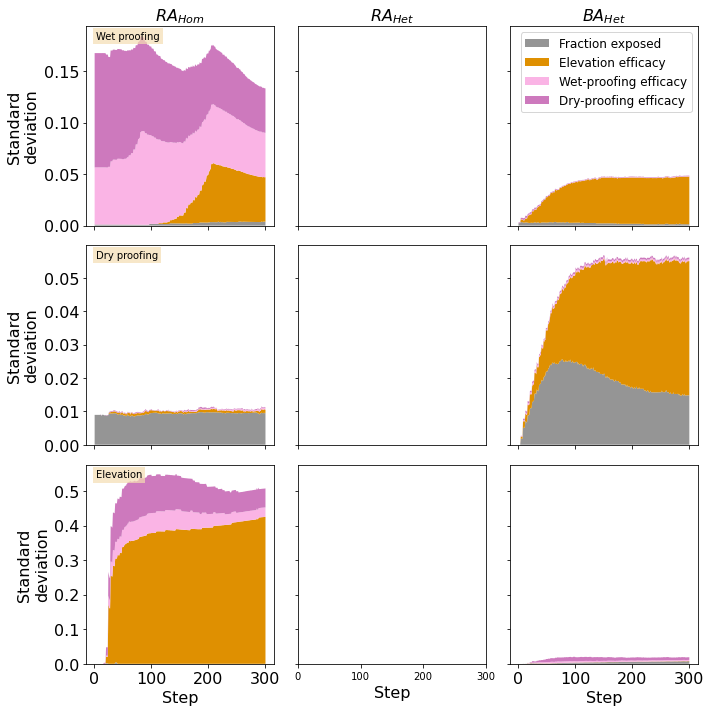

In [49]:
fig, axs = plt.subplots(3, 3, figsize=(10,10), sharey='row', sharex='col')
axs = axs.flatten()
# label physical distance for text in and down:
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
axs[0].set_title('$RA_{Hom}$', fontsize= 16)
axs[1].set_title('$RA_{Het}$', fontsize= 16)

for j, variable in enumerate(cca_variables):
    ST_indices = pd.read_csv(f'{data_dir[0]}_{variable}.csv', index_col=0)
    ST_indices = ST_indices.fillna(0)
    ST_indices = ST_indices.clip(0, 1)
    ST_indices = ST_indices.round(decimals=2)
    ST_indices = ST_indices.loc[:, '1':'300']
    mean_output = np.load(f'{data_dir[0]}_outputs_{variable}_means.npy')
    standard_deviation=np.std(mean_output, axis=0)[:300]
    adjusted = ST_indices.multiply(standard_deviation)
    axs[j*3].stackplot(np.arange(1,301), adjusted, baseline='zero', colors= color_list, labels=labels)
    axs[j*3].tick_params(axis='both', labelsize= 16)
    if j==2:
        axs[j*3].set_xticks(ticks = np.arange(0, 400, 100))
        axs[j*3].set_xticklabels(np.arange(0, 400, 100))
        axs[j*3].set_xlabel('Step', fontsize= 16)
    axs[j*3].set_ylabel("Standard\ndeviation", fontsize= 16)

    axs[j*3].text(0.0, 1.0, titles[j], transform=axs[j*3].transAxes + trans,
            fontsize='medium', verticalalignment='top', 
            bbox=dict(facecolor='wheat', alpha=0.7, edgecolor='none', pad=3.0))
    
axs[7].set_xticks(ticks = np.arange(0, 400, 100))
axs[7].set_xticklabels(np.arange(0, 400, 100))
axs[7].set_xlabel('Step', fontsize= 16)

axs[2].set_title('$BA_{Het}$', fontsize= 16)

for j, variable in enumerate(cca_variables):
    ST_indices = pd.read_csv(f'{data_dir[1]}_{variable}.csv', index_col=0)
    ST_indices = ST_indices.fillna(0)
    ST_indices = ST_indices.clip(0, 1)
    ST_indices = ST_indices.round(decimals=2)
    ST_indices = ST_indices.loc[:, '1':'300']
    mean_output = np.load(f'{data_dir[1]}_outputs_{variable}_means.npy')
    standard_deviation=np.std(mean_output, axis=0)[:300]
    adjusted = ST_indices.multiply(standard_deviation)
    axs[j*3+2].stackplot(np.arange(1,301), adjusted, baseline='zero', colors= color_list, labels=labels)
    if j==2:
        axs[j*3+2].set_xticks(ticks = np.arange(0, 400, 100))
        axs[j*3+2].set_xticklabels(np.arange(0, 400, 100))
        axs[j*3+2].set_xlabel('Step', fontsize= 16)
        axs[j*3+2].tick_params(axis='both', labelsize= 16)
#     axs[j*3+2].text(0.0, 1.0, titles[j], transform=axs[j*3+2].transAxes + trans,
#             fontsize='medium', verticalalignment='top', 
#             bbox=dict(facecolor='wheat', alpha=0.7, edgecolor='none', pad=3.0))
    
handles, labels = axs[2].get_legend_handles_labels()
axs[2].legend(handles, labels, fontsize=12, ncol = 1, loc='upper right')
#fig.suptitle("Share of standard deviation in adaptation\nmeasure explained by each factor", fontsize= 16, y=1)
plt.tight_layout()
plt.savefig('SA_adaptation.png', dpi=300)
plt.show()

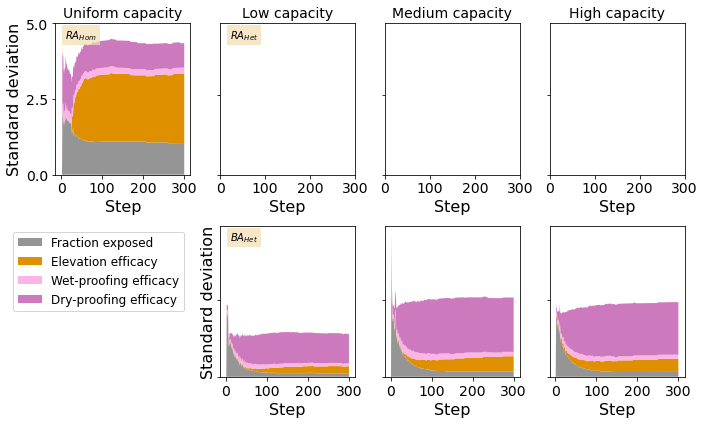

In [43]:
capacity_labels = ['Low capacity', 'Medium capacity', 'High capacity']
# label physical distance for text in and down:
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)

fig, axs = plt.subplots(2, 4, figsize=(10, 6), sharey='row')

ax = axs.flatten()[0]
ST_indices = pd.read_csv(f'EU_hom_SA_potential_damages.csv', index_col=0)
ST_indices = ST_indices.fillna(0)
ST_indices = ST_indices.clip(0, 1)
ST_indices = ST_indices.round(decimals=2)
ST_indices = ST_indices.loc[:, '1':'300']
mean_output = np.load(f'EU_hom_2_outputs_potential_damages_means.npy')
standard_deviation=np.std(mean_output, axis=0)[:300]
adjusted = ST_indices.multiply(standard_deviation)
ax.stackplot(np.arange(1,301), adjusted, baseline='zero', colors= color_list, labels=labels)
ax.set_xticks(ticks = np.arange(0, 400, 100))
ax.set_xticklabels(np.arange(0, 400, 100), fontsize= 14)
ax.set_yticks(ticks = np.arange(0, 6, 2.5))
ax.set_yticklabels(np.arange(0, 6, 2.5), fontsize= 14)
ax.set_ylabel("Standard deviation", fontsize= 16)
ax.set_title('Uniform capacity', fontsize= 14)
ax.set_xlabel("Step", fontsize= 16)
ax.text(0.0, 1.0, '$RA_{Hom}$', transform=ax.transAxes + trans,
        fontsize='medium', verticalalignment='top', 
        bbox=dict(facecolor='wheat', alpha=0.7, edgecolor='none', pad=3.0))

for j, ax in enumerate(axs.flatten()[1:4]):
    ax.set_xticks(ticks = np.arange(0, 400, 100))
    ax.set_xticklabels(np.arange(0, 400, 100), fontsize= 14)
    ax.set_title(capacity_labels[j], fontsize= 14)
    ax.set_xlabel("Step", fontsize= 16)
    if j==0:
        ax.text(0.0, 1.0, '$RA_{Het}$', transform=ax.transAxes + trans,
                fontsize='medium', verticalalignment='top', 
                bbox=dict(facecolor='wheat', alpha=0.7, edgecolor='none', pad=3.0))        

for j, ax in enumerate(axs.flatten()[5:]):
    ST_indices = pd.read_csv(f'PMT_het_SA_potential_damages_edu{j+2}.csv', index_col=0)
    ST_indices = ST_indices.fillna(0)
    ST_indices = ST_indices.clip(0, 1)
    ST_indices = ST_indices.round(decimals=2)
    ST_indices = ST_indices.loc[:, '1':'300']
    mean_output = np.load(f'PMT_het_2_outputs_potential_damages_means.npy')[:,:,j+1]
    standard_deviation=np.std(mean_output, axis=0)[:300]
    adjusted = ST_indices.multiply(standard_deviation)
    ax.stackplot(np.arange(1,301), adjusted, baseline='zero', colors= color_list, labels=labels)
    ax.set_xticks(ticks = np.arange(0, 400, 100))
    ax.set_xticklabels(np.arange(0, 400, 100), fontsize= 14)
    ax.set_xlabel("Step", fontsize= 16)
    if j==0:
        ax.text(0.0, 1.0, '$BA_{Het}$', transform=ax.transAxes + trans,
                fontsize='medium', verticalalignment='top', 
                bbox=dict(facecolor='wheat', alpha=0.7, edgecolor='none', pad=3.0)) 
        ax.set_yticks(ticks = np.arange(0, 6, 2.5))
        ax.set_yticklabels(np.arange(0, 6, 2.5), fontsize= 14)
        ax.set_ylabel("Standard deviation", fontsize= 16)

handles, labels = ax.get_legend_handles_labels()
#fig.suptitle("Share of standard deviation in potential damages\nexplained by each factor", fontsize= 18, y=1)
axs.flatten()[4].legend(handles, labels, fontsize=12, ncol = 1, loc='upper right')
axs.flatten()[4].axis('off')
plt.tight_layout()
plt.savefig('SA_damages.png', dpi=300)
plt.show()